# Regression Algorithm - with Ordinary Least Square Assumptions

 ### We will need the following libraries and modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### The data is about used cars and how the independent variables would influence the price of the car

In [2]:
dataset = pd.read_csv('Regression Data.csv')

In [3]:
dataset.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### There are 9 columns, of which price is the predctor or dependent variable

In [4]:
dataset.shape

(4345, 9)

### The rows (used cars) are *4345.*

In [5]:
dataset.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

#### Here there are 172 null values in Price and 150 null values in EngineV column. These rows values are to dropped from the dataset, as imputation wouldn't make much difference but deletion is the best decision. 

In [6]:
dataset['Price'].mean()

19418.74693505871

### The mean of price is *19418*

In [7]:
data = dataset.dropna(axis = 0)

### Null values are dropped

In [8]:
data.isnull().sum().sum()

0

### Therefore, there are no null values

### Exploring using plots
* Visualization serves as a great technique in the data exploration process
* The PDF(probability distribution function) will show us how that variable is distributed 
* This will help us in spotting outliers 
* The PDF also serves as the basis on which we take further decision to transform a feature

C:\Users\monis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

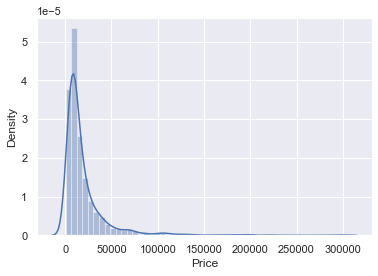

In [9]:
sns.distplot(data['Price'])

### There are outliers and eliminating them is a must, else the algorithm gets biased. 

In [10]:
p = data['Price'].quantile(0.95)
data_1 = data[data['Price']<p]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3823.000000,3823.000000,3823.000000,3823.000000
mean,14911.796798,171.095998,2.715250,2005.934868
std,12198.369515,99.269432,5.052605,6.565549
min,600.000000,0.000000,0.600000,1969.000000
25%,6800.000000,100.000000,1.800000,2002.000000
50%,10900.000000,163.000000,2.000000,2007.000000
75%,19150.000000,234.000000,3.000000,2011.000000
max,64500.000000,810.000000,99.990000,2016.000000


### Eliminated the data that lies over 95 quantile. Quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities

C:\Users\monis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

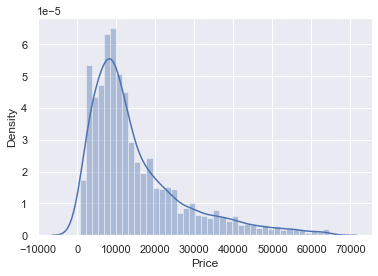

In [11]:
sns.distplot(data_1['Price'])

### Now the distribution seems to be rightly fit. 

C:\Users\monis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

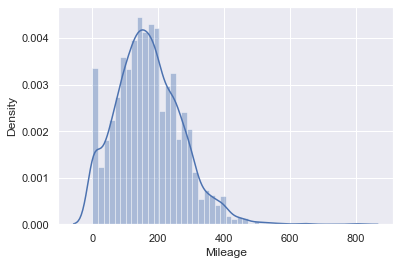

In [12]:
sns.distplot(data_1['Mileage'])

### Mileage also has a little share of outliers, and they are ought to be banished similar to Price outliers. 

In [13]:
m = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<m]

### This time, we have used 99 quantile, and the new mileage data is as follows. 

C:\Users\monis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

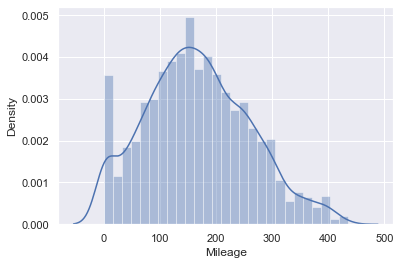

In [14]:
sns.distplot(data_2['Mileage'])

### The above plot is quiet accurate to a Normal Distribution

C:\Users\monis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

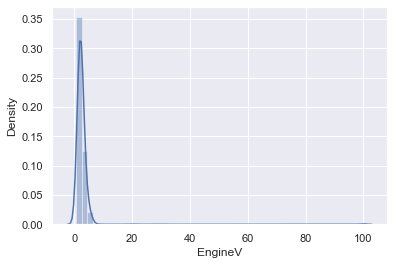

In [15]:
sns.distplot(data_2['EngineV'])

* A simple Google search can indicate the natural domain of this variable, Car engine volumes are usually below 6.5l
* This is a prime example of the fact that a domain expert (a person working in the car industry) finds it easy to locate the issue, whereas while building algorithms it is necessary to be equipped with *domain knowledge and business objectives intact*

In [16]:
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\monis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

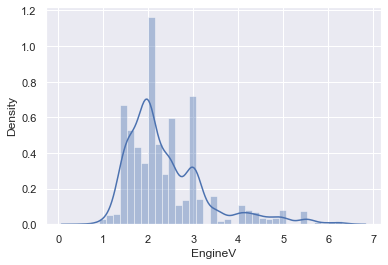

In [17]:
sns.distplot(data_3['EngineV'])

### Following this graph, we realize we can actually treat EngineV as a categorical variable

C:\Users\monis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

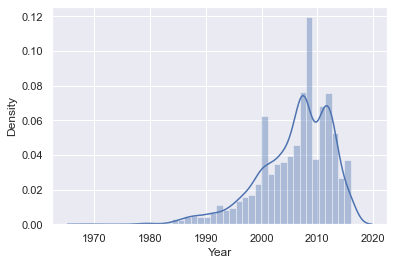

In [18]:
sns.distplot(data_3['Year'])

### Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'. However, the outliers are on the low end

In [19]:
y = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > y]

### Therefore, we remove the rows that lie in the 10th quantile, on the left side

C:\Users\monis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

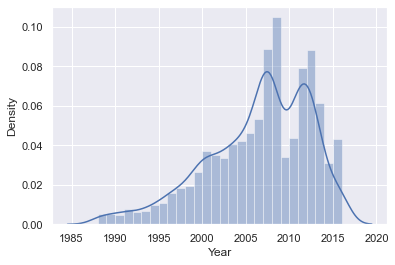

In [20]:
sns.distplot(data_4['Year'])

### Let's treat the data without missing values and outliers as *'data_cleaned'*

In [21]:
data_cleaned = data_4.reset_index(drop=True)

In [22]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3707,3707.000000,3707,3707.000000,3707.000000,3707,3707,3707.000000,3707
unique,7,NaN,6,NaN,NaN,4,2,NaN,282
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,840,NaN,1430,NaN,NaN,1695,3345,NaN,181
mean,NaN,15206.739496,NaN,166.731589,2.408435,NaN,NaN,2006.360399,NaN
std,NaN,12213.872637,NaN,92.674124,0.920792,NaN,NaN,5.982401,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7000.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11115.000000,NaN,160.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,19750.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


### The number of rows has finally came to *3707* from *4345*

## OLS ASSUMPTIONS
### Ordinary Least Squares is a type of linear least squares method for estimating the unknown parameters in a linear regression model. (According to Wikipedia)
### It is known as the best fit line, wherein the squared error is minimised 
### There are 5 Assumptions that are to be fulfilled to build a model, they are 
   * Linearity 
   * Homoscadasticity or Normally distributed errors 
   * Normality
   * No AutoCorrelation
   * No Multi-Collinearity

### So, let's check the assumptions
### 1. Linearity - Linearity is the property of a mathematical relationship that can be graphically represented as a straight line.

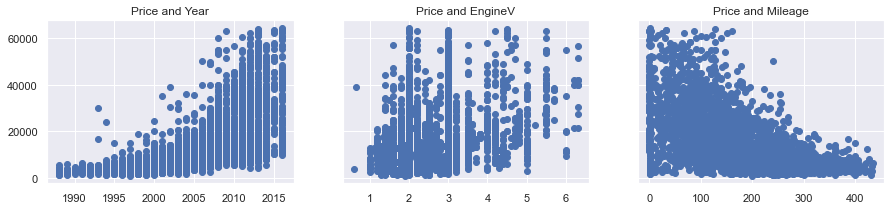

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y

ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

#### From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
#### A good transformation in that case is a log transformation


C:\Users\monis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

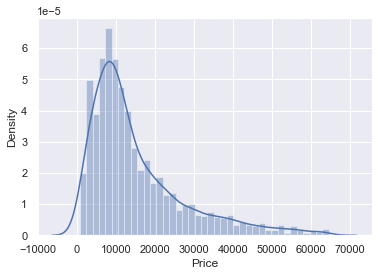

In [24]:
sns.distplot(data_cleaned['Price'])

### Let's transform 'Price' with a log transformation

In [25]:
log_price = np.log(data_cleaned['Price'])

In [26]:
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3702,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane,8.824678
3703,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3704,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3705,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


### Re-check the distributions with log_price

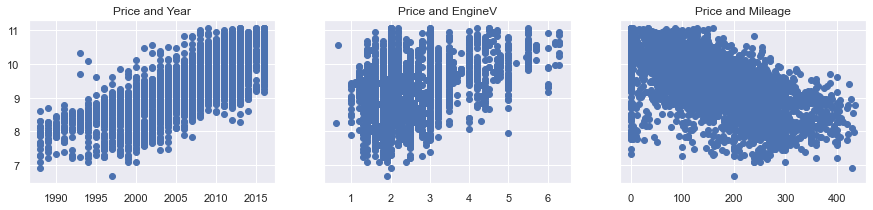

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y

ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')

plt.show()

### The relationships show a clear linear relationship
### This is some good linear regression material

### Since we will be using the log price variable, we can drop the old 'Price' one

In [28]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Thus, these are the columns we need to proceed further with

In [29]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

### 2. Multi-Collinearity - It is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.

* Sklearn does not have a built-in way to check for multicollinearity
* One of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
* The relevant module is Statsmodels Library
* since our categorical data is not yet preprocessed, we will only take the numerical ones which are - Mileage, Year, EngineV
* We create a new data frame which will include all the VIFs
* Here we make use of the variance_inflation_factor, which will basically output the respective VIFs 

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [31]:
vif

,VIF,Features
0,4.233150,Mileage
1,10.355853,Year
2,7.882953,EngineV


### The above output clearly depicts the IVF score < 10, thus this implies there is no multi-collinearity. 
### Since Year has the highest VIF, we need to exclude it 
### This will drive the VIF of other variables down!!! 
### So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case

In [32]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [33]:
data_no_multicollinearity.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Model', 'log_price'], dtype=object)

### To include the categorical data in the regression, let's create dummies
### There is a method called: *'get_dummies'* which does that seemlessly
### It is extremely important that we drop one of the dummies,otherwise we will introduce multicollinearity

In [34]:
data_no_multicollinearity = data_no_multicollinearity.drop(['Model'], axis = 1)

### The 'Model' attribute is dropped from the data because it creates many dummy columns(around 277) which is overwhelming for the Regression Model. Thus it is wiser to drop. 

In [35]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

### Create a copy of the dataset that has dummies

In [36]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

### To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
### Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies, but I like to keep dependent variable in the end, as it is the end outcome. 


In [37]:
cols = ['Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes','log_price']

### To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features

In [38]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,log_price
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,8.342840
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,8.974618
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,9.495519
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10.043249
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,9.814656


## Here comes the final step

## Building a Multiple Regression Model

In [39]:
# The target(s) (dependent variable) is 'log price'
y = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
X = data_preprocessed.drop(['log_price'],axis=1)

### Scaling the data for better accuracy and speeder computation

In [40]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(X)

StandardScaler()

In [41]:
# Scale the features and store them in a new variable (the actual scaling procedure)
X_scaled = scaler.transform(X)

In [42]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=365)

In [43]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [44]:
# Let's check the outputs of the regression
y_hat = reg.predict(x_train)

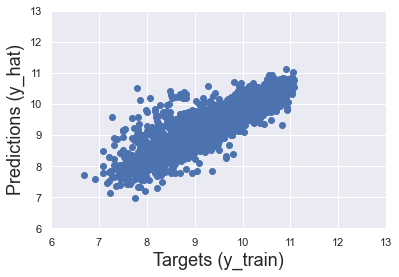

In [45]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

## Assumption 3 - Normally Distributed Errors
## NOTE : The model is linear and normally distributed, wheras Auto-Correlation would not be an issue for a regression model. 

C:\Users\monis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

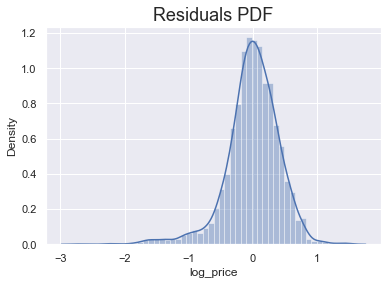

In [46]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

### This is a normally distributed plot

In [47]:
# the R-squared of the model
reg.score(x_train,y_train)

0.7251437793245914

In [49]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.33846716095417

In [50]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([-0.39506265,  0.18449465,  0.00941864, -0.00536622, -0.1358846 ,
       -0.18971622, -0.05305004, -0.08970514, -0.14491833, -0.09713984,
       -0.20166651, -0.12417048, -0.17214255, -0.12005971, -0.01808668,
       -0.13595436,  0.32794813])

In [51]:
# a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.395063
1,EngineV,0.184495
2,Brand_BMW,0.009419
3,Brand_Mercedes-Benz,-0.005366
4,Brand_Mitsubishi,-0.135885
5,Brand_Renault,-0.189716
6,Brand_Toyota,-0.053050
7,Brand_Volkswagen,-0.089705
8,Body_hatch,-0.144918
9,Body_other,-0.097140


In [52]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [53]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

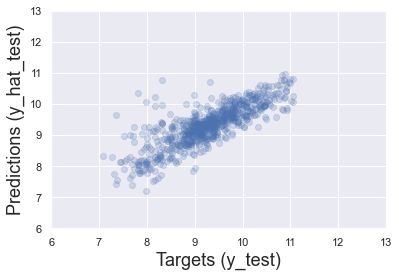

In [54]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [55]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,14068.353415
1,10774.515072
2,22161.886244
3,25482.851633
4,7760.573274


In [56]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,14068.353415,NaN
1,10774.515072,NaN
2,22161.886244,NaN
3,25482.851633,NaN
4,7760.573274,NaN
...,...,...
737,9947.541358,NaN
738,10800.398874,NaN
739,39548.252131,NaN
740,5857.909837,NaN


In [57]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    9.738023
1    8.922658
2    9.825526
3    9.998798
4    8.594154
Name: log_price, dtype: float64

In [58]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,14068.353415,16950.0
1,10774.515072,7500.0
2,22161.886244,18500.0
3,25482.851633,22000.0
4,7760.573274,5400.0
...,...,...
737,9947.541358,9200.0
738,10800.398874,9500.0
739,39548.252131,40500.0
740,5857.909837,6000.0


In [59]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [60]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,14068.353415,16950.0,2881.646585,17.000865
1,10774.515072,7500.0,-3274.515072,43.660201
2,22161.886244,18500.0,-3661.886244,19.793980
3,25482.851633,22000.0,-3482.851633,15.831144
4,7760.573274,5400.0,-2360.573274,43.714320
...,...,...,...,...
737,9947.541358,9200.0,-747.541358,8.125450
738,10800.398874,9500.0,-1300.398874,13.688409
739,39548.252131,40500.0,951.747869,2.349995
740,5857.909837,6000.0,142.090163,2.368169


In [61]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,742.000000,742.00000,742.000000,742.000000
mean,13430.168877,14252.35279,822.183913,41.079606
std,8760.241660,11723.58123,7162.932472,86.910349
min,1344.682047,1200.00000,-42847.192055,0.144898
25%,7591.568590,6762.50000,-2341.637686,10.006780
50%,11313.816962,10500.00000,-26.891524,23.007467
75%,17305.737061,17900.00000,2717.178193,40.949145
max,57855.618988,63200.00000,39812.512270,1157.940565


In [62]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999

# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
365,3705.36,3700.00,-5.36,0.14
16,9823.31,9800.00,-23.31,0.24
200,11654.79,11700.00,45.21,0.39
570,14561.51,14500.00,-61.51,0.42
608,14922.09,14990.00,67.91,0.45
128,16917.04,16999.00,81.96,0.48
340,15555.98,15635.10,79.12,0.51
459,15077.55,15000.00,-77.55,0.52
126,9549.34,9600.00,50.66,0.53
722,33820.06,34000.00,179.94,0.53
